https://webia.lip6.fr/~phw//aGrUM/BookOfWhy/

https://agrum.gitlab.io/pages/agrum.html

https://pyagrum.readthedocs.io/en/latest/notebooks.html

In [1]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [2]:
def voegToeBatterij(diag):
    B  = diag.addChanceNode(gum.LabelizedVariable('B','Battery',["ok","flat"])) 
    BHealth = diag.addChanceNode(gum.LabelizedVariable("BHealth", "Battery Health", ["ok", "broken"]))
    diag.addArc(BHealth, B)

In [3]:
def voegToeSwitch(diag):
    S1 = diag.addChanceNode(gum.LabelizedVariable('S1','Switch 1',["pos on","pos off"])) 
    S1Health = diag.addChanceNode(gum.LabelizedVariable("S1Health", "Switch1 Health", ["ok", "broken"]))
    diag.addArc(S1Health, S1)

In [4]:
def voegToeLamp(diag):
    L1 = diag.addChanceNode(gum.LabelizedVariable('L1','Light 1',["on","off"])) 
    L1Health = diag.addChanceNode(gum.LabelizedVariable("L1Health", "Lamp1 Health", ["ok", "broken"]))
    diag.addArc(L1Health, L1)

In [5]:
def voegToeConnecties(diag):
    idB = diag.idFromName("B")
    idS1 = diag.idFromName("S1")
    idL1 = diag.idFromName("L1")
    
    diag.addArc(idB, idS1)
    diag.addArc(idS1, idL1)


In [6]:
def voegToePriorsBatterij(diag, healthpriors):

    # cpt of battery: ok or flat 
    diag.cpt('BHealth')[0] = healthpriors[0] # BHealth:ok
    diag.cpt('BHealth')[1] = healthpriors[1] # BHealth:broken

    diag.cpt('B')[0, 0] = 0.25 # B:ok, BHealth:ok
    diag.cpt('B')[0, 1] = 0.25 # B:ok, BHealth:flat
    diag.cpt('B')[1, 0] = 0.25 # B:broken, BHealth:ok
    diag.cpt('B')[1, 1] = 0.25 # B:broken, BHealth:flat

In [7]:
def voegToePriorsSwitch(diag, healthpriors):
    
    diag.cpt('S1Health')[0] = healthpriors[0] # BHealth:ok
    diag.cpt('S1Health')[1] = healthpriors[1] # BHealth:broken
    
    diag.cpt('S1')[0, 0, 0] = 0.16 # S1Health:ok,     B:ok,   S1:pos on
    diag.cpt('S1')[0, 1, 0] = 0.16 # S1Health:ok,     B:flat, S1:pos on
    diag.cpt('S1')[0, 1, 1] = 0.16 # S1Health:ok,     B:flat, S1:pos off
    diag.cpt('S1')[0, 0, 1] = 0.16 # S1Health:ok,     B:ok,   S1:pos off
    diag.cpt('S1')[1, 0, 0] = 0.16 # S1Health:broken, B:ok,   S1:pos on
    diag.cpt('S1')[1, 1, 0] = 0.16 # S1Health:broken, B:flat, S1:pos on
    diag.cpt('S1')[1, 1, 1] = 0.16 # S1Health:broken, B:flat, S1:pos off
    diag.cpt('S1')[1, 0, 1] = 0.16 # S1Health:broken, B:ok,   S1: pos off

In [8]:
def voegToePriorsLamp(diag):
    
    diag.cpt('L1Health')[0] = 0.5 # BHealth:ok
    diag.cpt('L1Health')[1] = 0.5 # BHealth:broken
    
    diag.cpt('L1')[0, 0, 0] = 0.16 # L1Health:ok,     S1:pos on,  L1:on
    diag.cpt('L1')[0, 1, 0] = 0.16 # L1Health:ok,     S1:pos off, L1:on
    diag.cpt('L1')[0, 1, 1] = 0.16 # L1Health:ok,     S1:pos off, L1:off
    diag.cpt('L1')[0, 0, 1] = 0.16 # L1Health:ok,     S1:pos on,  L1:off
    diag.cpt('L1')[1, 0, 0] = 0.16 # L1Health:broken, S1:pos on,  L1:on
    diag.cpt('L1')[1, 1, 0] = 0.16 # L1Health:broken, S1:pos off, L1:on
    diag.cpt('L1')[1, 1, 1] = 0.16 # L1Health:broken, S1:pos off, L1:off
    diag.cpt('L1')[1, 0, 1] = 0.16 # L1Health:broken, S1:pos on,  L1:off

In [9]:
def voegToeVervangingBatterij(diag):
    BDecisionReplace=diag.addDecisionNode(gum.LabelizedVariable('BReplace', 'Replace', ["yes", "no"]))
    BUtilityReplace=diag.addUtilityNode(gum.LabelizedVariable("BUtilityReplace", "BUtilityReplace", 1))
    diag.addArc(BDecisionReplace, BUtilityReplace)
    diag.addArc(diag.idFromName("BHealth"), BUtilityReplace)

In [10]:
def voegToeVervangingSwitch(diag):
    S1DecisionReplace=diag.addDecisionNode(gum.LabelizedVariable('S1Replace', 'Replace', ["yes", "no"]))
    S1UtilityReplace=diag.addUtilityNode(gum.LabelizedVariable("S1UtilityReplace", "S1UtilityReplace", 1))
    diag.addArc(S1DecisionReplace, S1UtilityReplace)
    diag.addArc(diag.idFromName("S1Health"), S1UtilityReplace)

In [11]:
def voegToeVervangingLamp(diag):
    L1DecisionReplace=diag.addDecisionNode(gum.LabelizedVariable('L1Replace', 'Replace', ["yes", "no"]))
    L1UtilityReplace=diag.addUtilityNode(gum.LabelizedVariable("L1UtilityReplace", "L1UtilityReplace", 1))
    diag.addArc(L1DecisionReplace, L1UtilityReplace)
    diag.addArc(diag.idFromName("L1Health"), L1UtilityReplace)

In [12]:
def voegToeUtilityReplaceBatterij(diag, values):
    diag.utility("BUtilityReplace")[0,0] = values[0] # BHealth:ok, BReplace:yes
    diag.utility("BUtilityReplace")[0,1] = values[1] # BHealth:ok, BReplace:no
    diag.utility("BUtilityReplace")[1,0] = values[2] # BHealth:broken, BReplace:yes
    diag.utility("BUtilityReplace")[1,1] = values[3] # BHealth:broken, BReplace:no

    
def voegToeUtilityReplaceSwitch(diag, values):
    diag.utility("S1UtilityReplace")[0,0] = values[0] # S1Health:ok, S1Replace:yes
    diag.utility("S1UtilityReplace")[0,1] = values[1] # S1Health:ok, S1Replace:no
    diag.utility("S1UtilityReplace")[1,0] = values[2] # S1Health:broken, S1Replace:yes
    diag.utility("S1UtilityReplace")[1,1] = values[3] # S1Health:broken, S1Replace:no


def voegToeUtilityReplaceLamp(diag, values):
    diag.utility("L1UtilityReplace")[0,0] = values[0] # L1Health:ok, L1Replace:yes
    diag.utility("L1UtilityReplace")[0,1] = values[1] # L1Health:ok, L1Replace:no
    diag.utility("L1UtilityReplace")[1,0] = values[2] # L1Health:broken, L1Replace:yes
    diag.utility("L1UtilityReplace")[1,1] = values[3] # L1Health:broken, L1Replace:no


# Analyse waarden

## Verklaren waarden voor utility, decision en health

Simpel diagram voor alleen de batterij

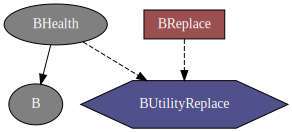

In [13]:
# diagram maken
diag = gum.InfluenceDiagram()

voegToeBatterij(diag)
voegToePriorsBatterij(diag, [0.5,0.5])
voegToeVervangingBatterij(diag)
voegToeUtilityReplaceBatterij(diag, [1, 2, 4, 1])

gnb.showInfluenceDiagram(diag, size=60)

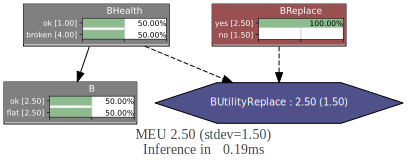

In [14]:
# inference zonder bewijs
bewijs={}
gnb.showInference(diag, evs=bewijs, size=40)

### berekening:

Utility tabel voor BUtilityReplace:
- ok / yes: 1
- ok / no: 2
- broken / yes: 4
- broken / no: 1

berekenen BUtilityReplace:
- replace yes: 4 * 0.5 + 1 * 0.5 = 2.5
- replace no:  2 * 0.5 + 1 * 0.5 = 1.5

BReplace = BUtilityReplace

berekenen BHealth (indien BReplace: yes) 
- BHealth:ok     = 1
- BHealth:broken = 4

B
- ok = 0.5 * 1 + 0.5 * 4 = 2,5
- flat = gelijk

## Verklaren waarden voor utility, decision en health

Simpel diagram voor alleen de batterij, 1 waarden aangepast in utilitytabel

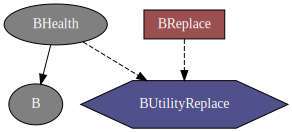

In [15]:
# create influence diagram
diag2 = gum.InfluenceDiagram()

voegToeBatterij(diag2)
voegToePriorsBatterij(diag2, [0.5,0.5])
voegToeVervangingBatterij(diag2)
voegToeUtilityReplaceBatterij(diag2, [1, 2, 3, 1])
gnb.showInfluenceDiagram(diag2, size=60)

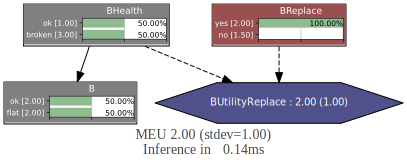

In [16]:
# inference
bewijs2={}
gnb.showInference(diag2, evs=bewijs2, size=40)

### berekening:

berekenen BUtilityReplace:
- replace yes: 3 * 0.5 + 1 * 0.5 = 2
- replace no:  2 * 0.5 + 1 * 0.5 = 1.5

BReplace = BUtilityReplace = yes

berekenen BHealth (indien BReplace: yes) 
- BHealth:ok     = 1
- BHealth:broken = 3

B
- ok = 0.5 * 1 + 0.5 * 3 = 2
- flat = gelijk

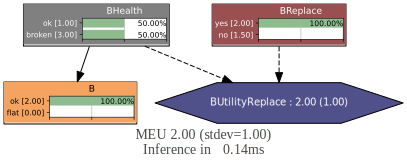

In [17]:
bewijs2={'B':0}
gnb.showInference(diag2, evs=bewijs2, size=40)

## Verklaren waarden voor utility, decision en health

Simpel diagram voor alleen de batterij, bewijs health toegevoegd

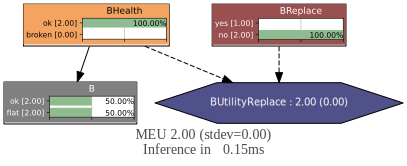

In [18]:
bewijs2={'BHealth':0}
gnb.showInference(diag2, evs=bewijs2, size=40)

### berekening

Utility tabel voor BUtilityReplace:
- ok / yes: 1
- ok / no: 2
- broken / yes: 4 maar valt weg vanwege bewijs
- broken / no: 1 maar valt weg vanwege bewijs

berekenen BUtilityReplace:
- stap 1: BHealth utility OK: 2, of broken: 1 maar deze laatste doet niet meer mee vanwege evidence en is dus 0
- stap 2: 2 is de optimale utility
- stap 3: bij 2 hoort besluit no dus BReplace:no
- stap 4: bij BReplace:yes hoort dan nog 1


B
- Aan B wordt de volledige waarde van 2 doorgegeven

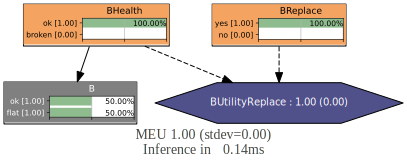

In [19]:
bewijs2={'BHealth':0, 'BReplace':0}
gnb.showInference(diag2, evs=bewijs2, size=40)

## met andere kansen


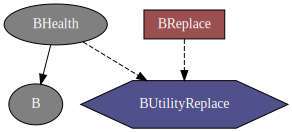

In [20]:
# create influence diagram
diag3 = gum.InfluenceDiagram()

voegToeBatterij(diag3)
voegToePriorsBatterij(diag3, [0.8,0.2])
voegToeVervangingBatterij(diag3)
voegToeUtilityReplaceBatterij(diag3, [1, 2, 4, 1])
gnb.showInfluenceDiagram(diag3, size=60)

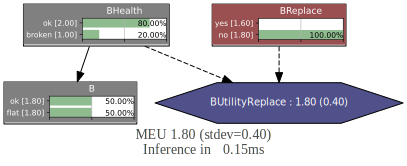

In [21]:
bewijs3={}
gnb.showInference(diag3, evs=bewijs3, size=40)

### berekening

Utility tabel voor BUtilityReplace:
- ok / yes: 1
- ok / no: 2
- broken / yes: 4 
- broken / no: 1 


bepalen BUtilityReplace per decision optie:
- voor yes: 1 * 0.8 + 4 * 0.2 = 1.6
- voor no:  2 * 0.8 + 1 * 0.2 = 1.8
- keuze voor no

bepalen BHealth, gegeven optimale decision
- ok: 2
- broken: 1

Bepalen B
- waarde die doorsijpelt is 2 * .8 + 1 * 0.2 = 1.8

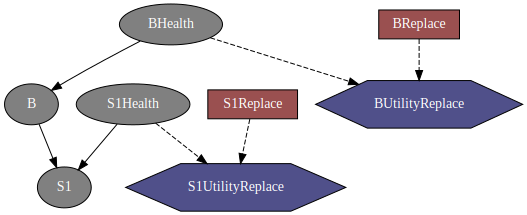

In [22]:
# volledig diagram
diag4 = gum.InfluenceDiagram()

voegToeBatterij(diag4)
voegToeSwitch(diag4)
diag4.addArc('B', 'S1')
voegToePriorsBatterij(diag4, [0.9,0.1])
voegToePriorsSwitch(diag4, [0.9,0.1])
voegToeVervangingBatterij(diag4)
voegToeUtilityReplaceBatterij(diag4, [1, 2, 3, 1])
voegToeVervangingSwitch(diag4)
voegToeUtilityReplaceSwitch(diag4, [1, 2, 3, 1])
gnb.showInfluenceDiagram(diag4, size=60)

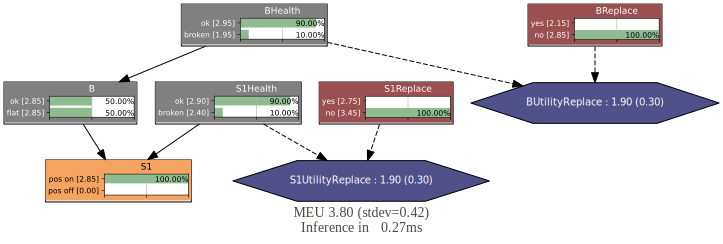

In [23]:
bewijs4={'S1':0}
gnb.showInference(diag4, evs=bewijs4, size=40)

### berekening

bepalen B replace utility per besluit
- yes: 1 * .9 + 3 * .1 = 1.2
- no:  2 * .9 + 1 * .1 = 1.9

decision = no > BHealth
- ok: 2
- broken: 1

Bepalen S1 replace utility
- yes: 1 * .8 + 3 * .2 = 1.4
- no:  2 * .8 + 1 * .2 = 1.8

decision = no > S1Health
- ok: 2
- broken: 1
 



In [24]:
gnb.flow.row(diag4.utility('S1UtilityReplace'), diag4.utility('BUtilityReplace'))

Influence Diagram{
  chance: 6,
  utility: 3,
  decision: 3,
  arcs: 11,
  domainSize: 512
}


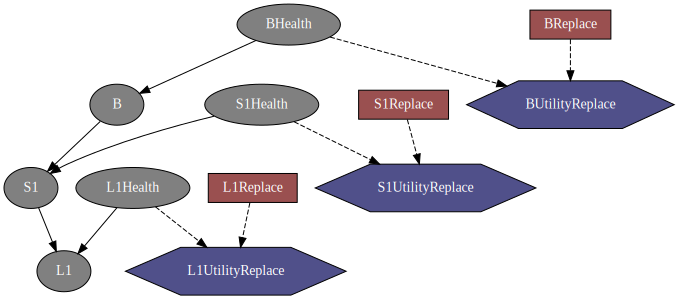

In [25]:
# volledig diagram
diag5 = gum.InfluenceDiagram()

voegToeBatterij(diag5)
voegToeSwitch(diag5)
voegToeLamp(diag5)
voegToeConnecties(diag5)

voegToePriorsBatterij(diag5, [0.5,0.5])
voegToePriorsSwitch(diag5, [0.5, 0.5])
voegToePriorsLamp(diag5)

voegToeVervangingBatterij(diag5)
voegToeUtilityReplaceBatterij(diag5, [1, 2, 3, 1])

voegToeVervangingSwitch(diag5)
voegToeUtilityReplaceSwitch(diag5, [0,0,0,0])

voegToeVervangingLamp(diag5)
voegToeUtilityReplaceLamp(diag5, [0,0,0,0])

print(diag5)
gnb.showInfluenceDiagram(diag5, size=60)

In [26]:
gnb.flow.row(diag5.utility('BUtilityReplace'), 
             diag5.utility('S1UtilityReplace'),
             diag5.utility('L1UtilityReplace'))

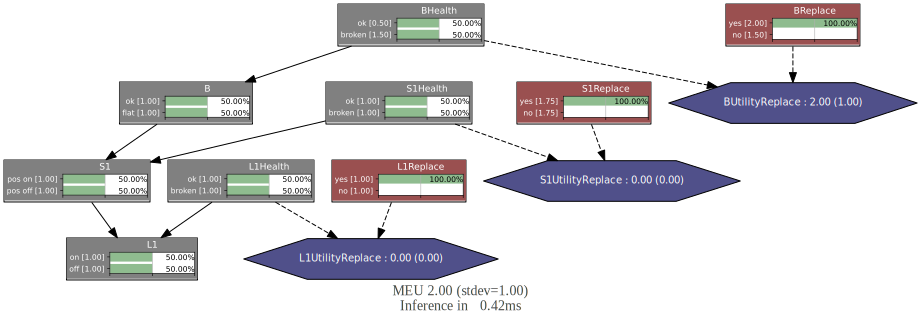

In [27]:
bewijs5={}
gnb.showInference(diag5, evs=bewijs5, size=40)